<a href="https://colab.research.google.com/github/guilherme-beserra/portfolio/blob/master/Analisando_os_Dados_do_Airbnb_de_Genebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Genebra (Geneva)*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

<center><img alt="Visão central de Genebra" width="50%" src="https://www.nationsonline.org/gallery/Switzerland/Geneve-panorama.jpg"</center>

Panorama de Genebra da parte sudeste com o lago no centro.

Imagem: Ork.ch

Genebra é uma cidade na Suíça que fica na parte sul do vasto Lago Léman (Lago de Genebra). Rodeada pelas montanhas dos Alpes e do Jura, a cidade tem vista para o impressionante Mont Blanc. Sede das Nações Unidas e da Cruz Vermelha na Europa, é um centro diplomático e financeiro global. A influência francesa está por toda parte, no idioma, na gastronomia e em bairros boêmios.

Elevação: 375 m

Área: 15,93 km²

População: 198.979 (2017) Organização das Nações Unidas

Fonte: https://pt.wikipedia.org/wiki/Genebra

**Neste *notebook*, iremos analisar os dados referentes à cidade de Genebra - Suiça, e ver quais insights podem ser extraídos a partir de dados brutos. Os dados estão atualizados até 21 de setembro de 2021.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Obtenção dos Dados


In [1]:
# importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importando o arquivo listings.csv para um DataFrame referente aos dados da cidade de Genebra (Geneve) - Suiça
df_genebra = pd.read_csv("http://data.insideairbnb.com/switzerland/geneva/geneva/2021-07-19/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (locatário) da propriedade
* `host_name` - nome do locatário
* `neighbourhood_group` - coluna sem nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude do imóvel
* `longitude` - coordenada da longitude do imóvel
* `room_type` - informa o tipo de quarto oferecido
* `price` - preço de aluguel do imóvel
* `minimum_nights` - quantidade mínima de noites requeridas para reserva
* `number_of_reviews` - número de avaliações do imóvel
* `last_review` - data da última avaliação
* `reviews_per_month` - quantidade de avaliações por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo locatário
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de avaliações nos últimos 12 meses
* `license` - Airbnb / número de licença (coluna sem valor válido)

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrando as cinco primeiras entradas para os imóveis anunciados
df_genebra.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,42515,Geneva center - Hosting females,185647,Noelle,NaN,Commune de Genève,46.20140,6.15507,Private room,73,14,58,2019-10-23,1.18,1,321,1,NaN
1,44959,Perfect Cozy Bedroom Close to Lake & Transport,198343,Rita,NaN,Commune de Genève,46.19704,6.16076,Private room,59,1,49,2018-10-24,0.66,1,0,0,NaN
2,276025,Lovely flat by Geneva lake,1442438,Gaby,NaN,Versoix,46.27944,6.16724,Entire home/apt,65,7,107,2019-05-14,1.14,1,292,8,NaN
3,325986,"Stylish loft in Pâquis, next to UN",1667362,Virna,NaN,Commune de Genève,46.21428,6.14610,Entire home/apt,150,3,104,2019-10-10,1.01,1,315,2,NaN
4,338682,Top location 1 block from the lake!,1001280,Mike,NaN,Commune de Genève,46.20682,6.15526,Entire home/apt,157,6,95,2020-03-07,1.01,2,46,8,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificando o volume de dados do DataFrame dos imóveis
print("Quantidade de entradas (linhas):", df_genebra.shape[0])
print("Quantidade de variáveis (colunas): {}\n".format(df_genebra.shape[1]))

# verificar os tipos de entradas do dataset
df_genebra.dtypes

Quantidade de entradas (linhas): 2103
Quantidade de variáveis (colunas): 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df_genebra.isnull().sum()/df_genebra.shape[0]).sort_values(ascending = False)


license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.248692
last_review                       0.248692
longitude                         0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

In [6]:
#eliminando as variáveis com dados ausentes
df_genebra.drop(['neighbourhood_group', 'license'], axis = 1, inplace = True)

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, apresentaremos abaixo os histogramas. Percebemos alguns valores discrepantes (ouliers) nas principais variáveis: preço (price), mínimo de noites (minimum_nights) e avaliações por mês (reviews_per_month). 

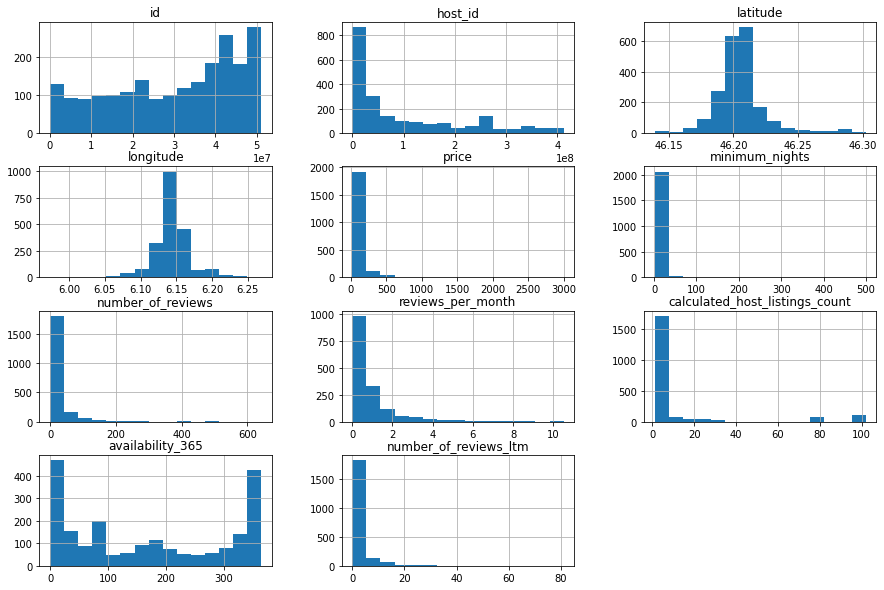

In [7]:
# histograma das variáveis numéricas
df_genebra.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**
Conforme item anterior verificamos valores discrepantes presentes. Vamos analisar mais de perto esse problema através do resumo estatístico (método "describe") e gráficos boxplots para as variáveis: `price` e `minimum_nights`.

In [ ]:
# verificando o resumo estatístico para o preço e o mínimo de noites
df_genebra[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,2103.000000,2103.000000
mean,129.575844,7.012839
std,140.618116,21.006825
min,22.000000,1.000000
25%,73.000000,1.000000
50%,100.000000,3.000000
75%,140.000000,5.000000
max,3000.000000,500.000000


De acordo com o resumo estatístico, podemos verificar que a variável preço (`price`) possui 75% dos valores de preço abaixo de `€` 140, porém o valor máximo é `€`3000, demonstrando que este valor está muito discrepante. De forma semelhante, o número mínimo de noites (`minimum_nights`) tem 75% dos valores abaixo de 5 noites, mas o valor máximo chega a ultrapassar 1 ano: 500 noites.


#### Boxplot para mínimo de noites (`minimum_nights`)

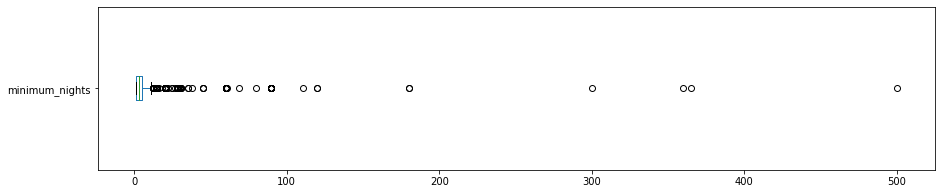

valores acima de 4 (noites): 
243 entradas
11.5549%


In [14]:
df_genebra.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()
#apresentando os valores de mínimo de noites (minimum_nights) acima de 4
print("valores acima de 4 (noites): ")
print("{} entradas".format(len(df_genebra[df_genebra.minimum_nights > 11])))
print("{:.4f}%".format((len(df_genebra[df_genebra.minimum_nights > 11]) / df_genebra.shape[0]) * 100))

#### Boxplot para o preço por dia (`price`)

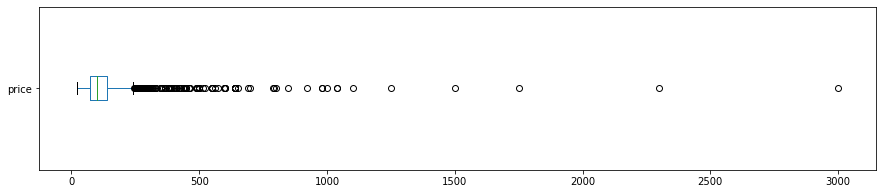

valores acima de €240: 
159 entradas
7.5606%


In [12]:
df_genebra.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()
#apresentando os valores acima de 240.5 euros 
print("valores acima de €240.5: ")
print("{} entradas".format(len(df_genebra[df_genebra.price > 240.5])))
print("{:.4f}%".format((len(df_genebra[df_genebra.price > 240.5]) / df_genebra.shape[0]) * 100))

#### Histogramas sem *outliers* (valores discrepantes)

Identificados *outliers* nas variáveis `price` e `minimum_nights`, removeremos essas entradas discrepantes do *DataFrame* e "plotar" novamente o histograma.

In [8]:
# identificando os outliers para a variável price
q1_price = df_genebra.price.quantile(.25)
q3_price = df_genebra.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df_genebra.minimum_nights.quantile(.25)
q3_minimum_nights = df_genebra.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável price:  67.0
Limite superior de price:  240.5
Limite inferior de price:  -27.5
IQR da variável minimum_nights:  4.0
Limite superior de minimum_nights:  11.0
Limite inferior de minimum_nights:  -5.0


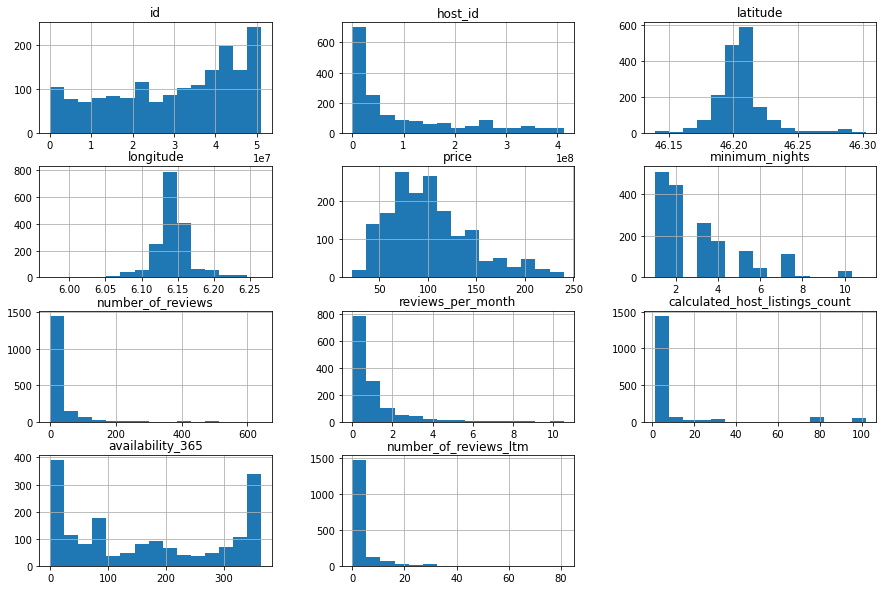

In [16]:
df_clean = df_genebra.copy()

#apagando os ouliers
df_clean.drop(labels=df_clean[df_clean.price > 240].index, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(labels=df_clean[df_clean.minimum_nights > 11].index, inplace=True)

#apresentando o novo gráfico sem os outliers
df_clean.hist(bins=15, figsize=(15,10));

Os novos histogramas para as variáveis `price` e `minimum_nights` apresentaram uma maior proximidade da distribuição normal após a exclusão dos outliers.


### **Q4. Qual a média dos preços de aluguel?**

A média de preços de aluguel em Genebra é € 102,64

In [19]:
# ver a média da coluna `price``
print("Média dos preços dos imóveis: €{:.2f}".format(df_clean.price.mean()))

Média dos preços dos imóveis: €102.64


### **Q4. Qual a correlação existente entre as variáveis?**

In [20]:
# criando uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrando a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.076773,-0.096293,-0.123694,0.087464,0.010258
minimum_nights,0.076773,1.000000,-0.161497,-0.245239,0.009835,-0.042055
number_of_reviews,-0.096293,-0.161497,1.000000,0.734492,-0.049409,0.055202
reviews_per_month,-0.123694,-0.245239,0.734492,1.000000,-0.021527,0.029308
calculated_host_listings_count,0.087464,0.009835,-0.049409,-0.021527,1.000000,-0.135285
availability_365,0.010258,-0.042055,0.055202,0.029308,-0.135285,1.000000


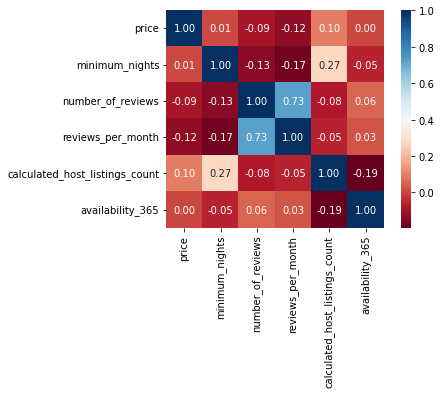

In [ ]:
# plotando um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

A maioria das variáveis tem uma correlação negativa em relação as demais. Por exemplo, quanto maior o preço, menor a quantidade mínima de noites necessárias para estadia.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [21]:
# mostrando a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    1109
Private room        590
Shared room          10
Hotel room            5
Name: room_type, dtype: int64

Uma casa ou apartamento (completo) é o tipo de imóvel mais ofertado, com 1.109 unidades. Em seguida, com menos metade das ocorrências, aparece quarto privado.

In [22]:
# porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_genebra.shape[0]

Entire home/apt    0.527342
Private room       0.280552
Shared room        0.004755
Hotel room         0.002378
Name: room_type, dtype: float64

Assim, cerca de 80% dos imóveis são do tipo casa/apartamento completo e quarto privado.

### **Q6. Qual a localidade mais cara de Genebra?**



In [23]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Hermance              209.250000
Cologny               137.263158
Collex-Bossy          123.500000
Pregny-Chambésy       122.562500
Satigny               118.333333
Perly-Certoux         112.333333
Bellevue              111.500000
Chêne-Bourg           109.636364
Presinge              109.000000
Plan-les-Ouates       107.214286
Genthod               106.857143
Commune de Genève     106.389731
Meinier               105.500000
Soral                 104.000000
Chêne-Bougeries       103.896552
Bardonnex             100.800000
Russin                100.000000
Dardagny              100.000000
Confignon              97.800000
Vandoeuvres            96.500000
Collonge-Bellerive     94.625000
Versoix                93.312500
Carouge                92.618421
Grand-Saconnex         89.820000
Lancy                  89.431818
Veyrier                87.722222
Puplinge               85.750000
Meyrin                 84.515152
Choulex                83.000000
Corsier                81.800

Hermance é a localidade mais cara para locação, com média de preço em € 209,25 bem acima das demais localidades. 

O lugar mais barato, em média, é o Chancy (€ 50).

Hermance é uma comuna suíça do Cantão de Genebra na margem esquerda do Lago Lemano. Faz fronteira com Alta Saboia francesa.
Encontra-se na chamada Região Lemánica e mais precisamente na parte chamada de Lago de Genebra do Pequeno Lago. 

Chancy é uma comuna suíça do Cantão de Genebra que tem Avully e Avusy a Norte e Esta. Segundo o Departamento Federal de Estatísticas, Chancy ocupa uma superfície de 5.36 km2 com uma cobertura agrícola de 32 % e unicamente 11 % habitável, motivo pelo qual deve seu valor mais baixo.

Fonte: https://pt.wikipedia.org/wiki/Hermance

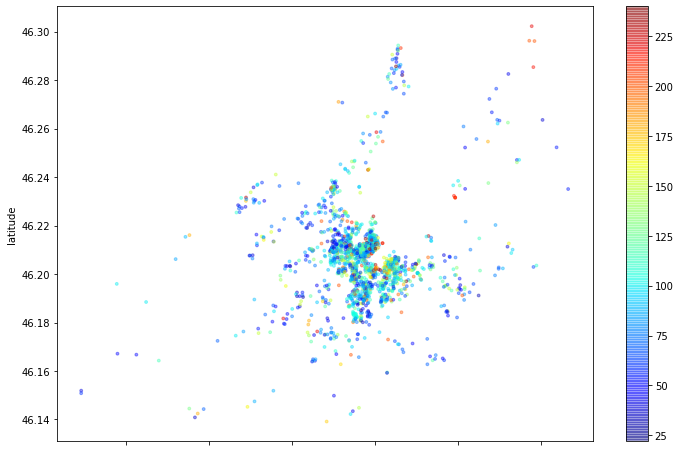

In [24]:
# plotando os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [25]:
# ver a média da coluna `minimum_nights``

df_clean.groupby(['minimum_nights']).price.mean().sort_values(ascending=False)

minimum_nights
9     154.333333
8     113.400000
4     112.508671
5     109.277778
2     107.379233
3     106.536122
7     105.403509
11    105.000000
6     100.978723
1      91.495069
10     87.709677
Name: price, dtype: float64

Os imóveis que exigem apenas o mínimo de 1 (uma) noite tem preço médio de € 91,49, inferior a média geral de preço que é de € 102,64. Para o mínimo de duas noites, a média de preço já aumenta para € 107,37.

## Conclusões


Conforme os dados apresentados até 21 de setembro de 2021. Alguns dados discrepantes (`outliers`) foram removidos para uma melhor análise, principalmente naqueles onde os preços eram muito superiores à media e o número mínimo de noites de permanência eram superiores a 30 noites.

Genebra possui uma média de preço de uma diária em cerca de € 102,64, demonstrando uma opção relativamente cara tendo em vista a desvalorização do Real, em que 1,00 Euro Tur vale hoje (15/10/2021) R$ 6,6927. A maioria das opções de locação se referem a casas ou quartos completos (sem compartilhamento de cômodos).

A localidade de Hermance, à beira do rio Genebra, possui os valores mais altos para locação mas outras localidades à beira do rio podem ser mais em conta como por exemplo, Cologny com preço médio de € 137,26. 

Os lugares mais baratos são os mais distantes do rio, como mostrado anteriormente no caso da comuna Suiça de Chancy, custando em média € 50.

Destacamos que o conjunto de dados é uma versão resumida, mais adequada para uma análise inicial. 